# 3- Capability analysis Examples

## 3.1- Short Term Analysis

### 3.1.1- Introduction

As short term analysis, the production of sulphuric acid is selected. Both, obtaining sulphuric acid in the rigth concentration and maintaining the impurity below certain levels is important for the client. Lets check if this process is capable

### 3.1.2- STEP 1: Get the measurement

In [2]:
from pypetb import Capability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set seaborn style to improve the figure sight
sns.set()

# Load measurement dataset
url = 'https://raw.githubusercontent.com/jgherruzo/myFreeDatasets/main/SA.csv' # noqa
df=pd.read_csv(url)
print(df.info()) # In order to check column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  365 non-null    int64  
 1   Impurity    365 non-null    float64
 2   purity      365 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.7 KB
None


### 3.1.3- STEP 2: Build up the model and solve it

In [4]:
#Lets define the model
dict_info={
  'value':'Impurity',
  'batch':'',
  'LSL':"",
  'HSL':75,
  'goal':30
}  
Model_Cp=Capability.Capability(df,dict_info)

#check everything was going well
print(Model_Cp.getLog())


HSL is specified
 not match with column names ['Unnamed: 0', 'Impurity', 'purity']
Short term analysis is activated
Model is created



### 3.1.4- STEP 3: Check normality

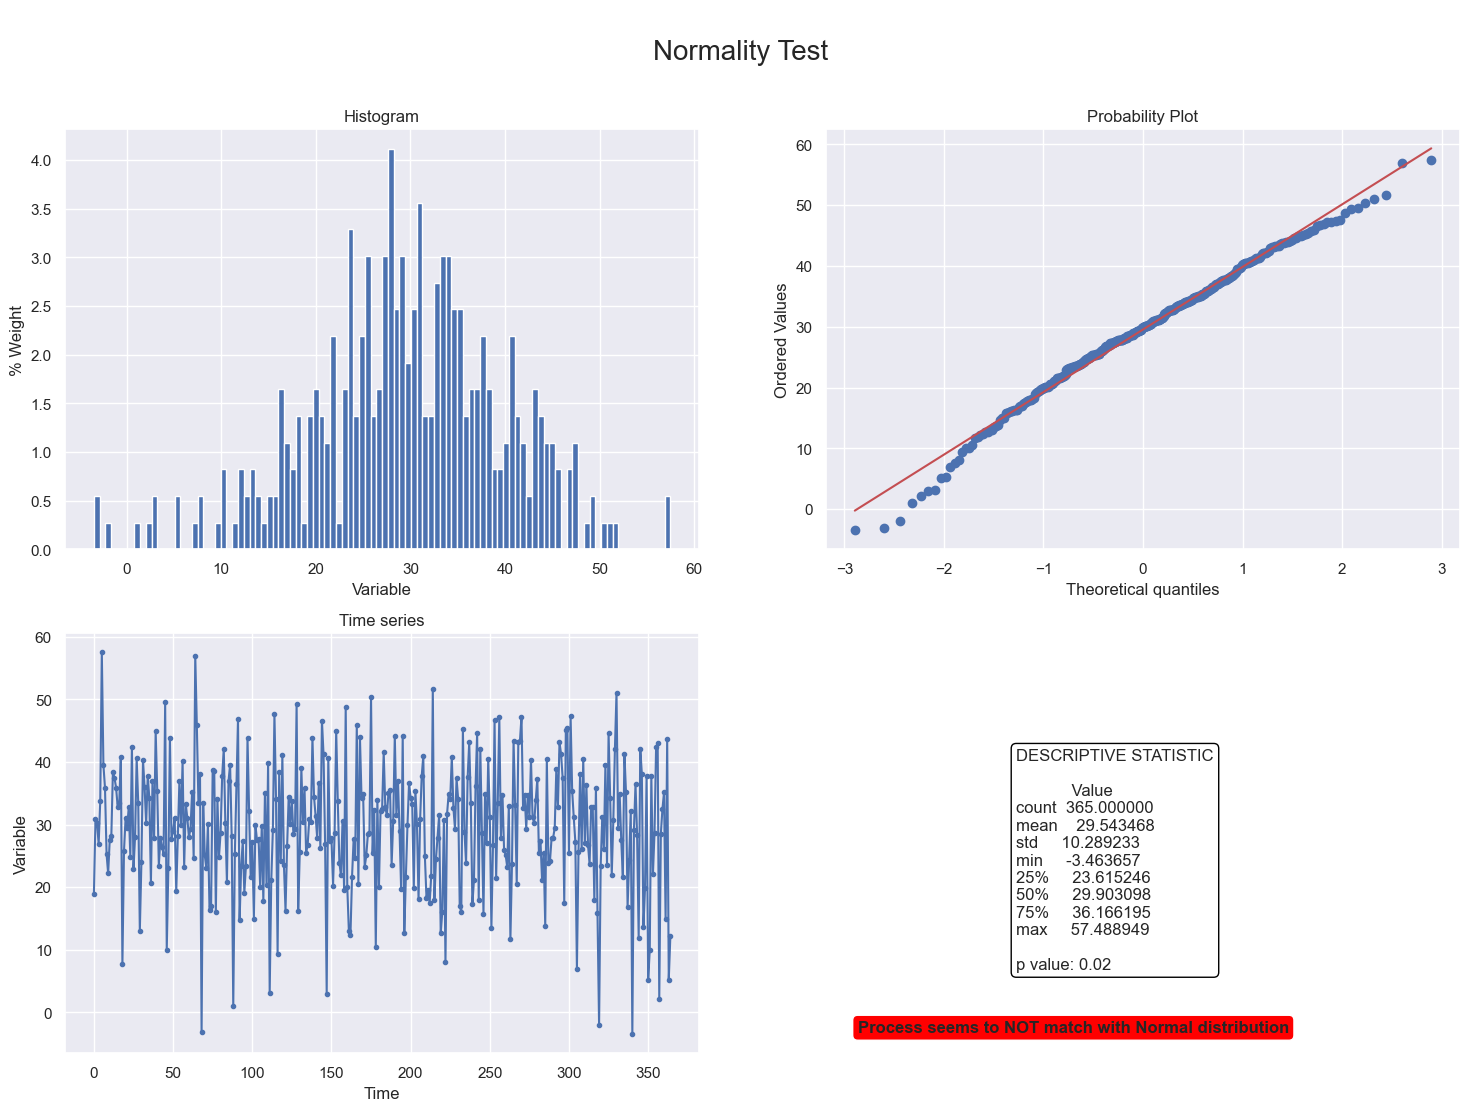

In [5]:
figure=Model_Cp.Normality_test()

so capability analysis is not available for the impurity

### 3.2- Short term analysis for sulphuric acid purity

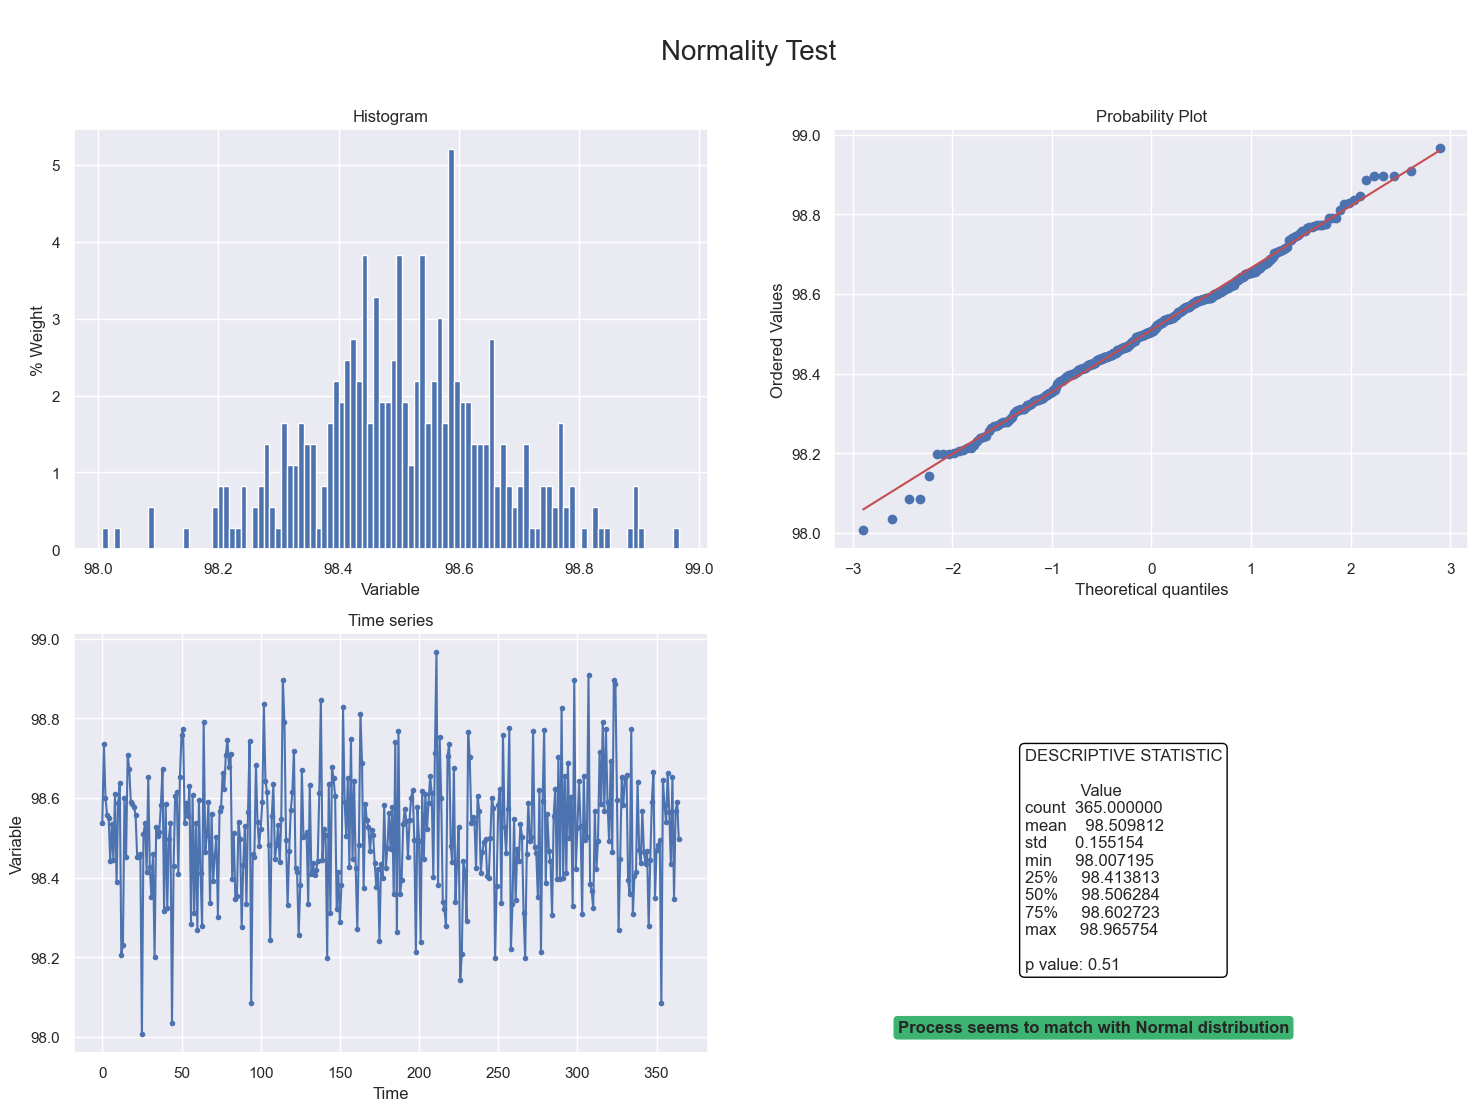

In [7]:
#Lets define the model
dict_info={
  'value':'purity',
  'batch':'',
  'LSL':98,
  'HSL':"",
  'goal':98.5
}  
Model_Cp=Capability.Capability(df,dict_info)

figure=Model_Cp.Normality_test()
plt.show()

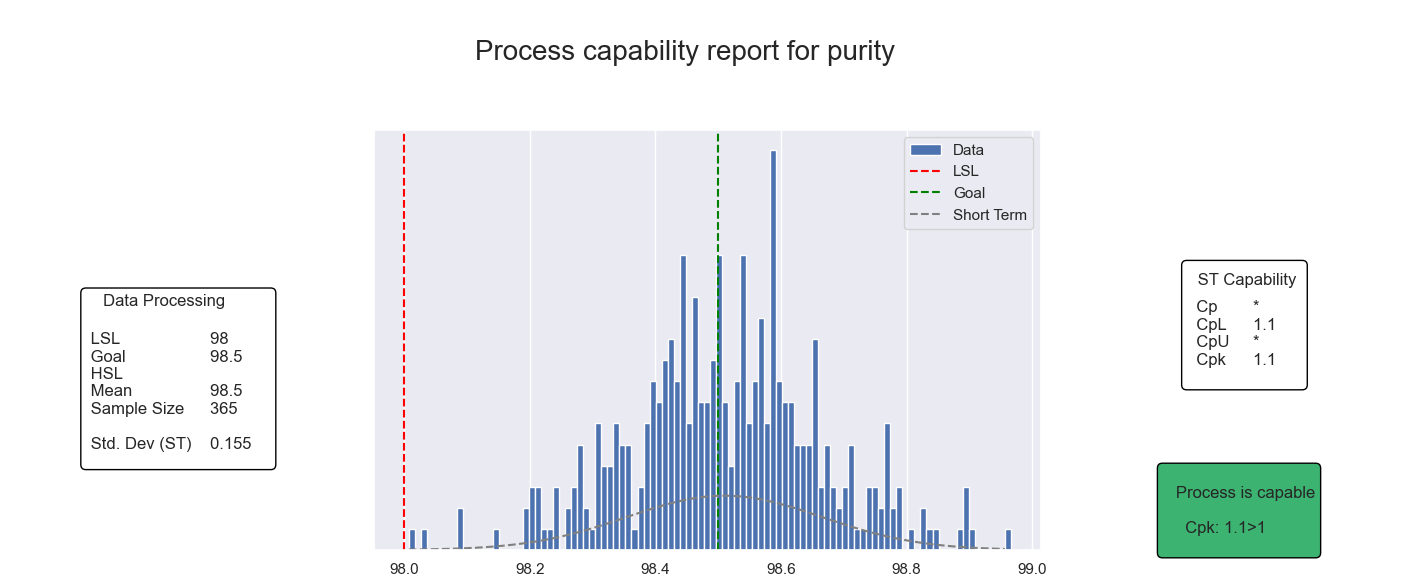

In [8]:
figure=Model_Cp.Report()
plt.show()

So process is capable to achieve purity specifications

## 3.3- Long Term Analysis

### 3.3.1- Introduction

In this example it will be analyzed a process focused on filling proteins bottles.

### 3.3.2- STEP 1: Get the measurement

In [10]:
from pypetb import Capability
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#set seaborn style to improve the figure sight
sns.set()

# Load measurement dataset
url = 'https://raw.githubusercontent.com/jgherruzo/myFreeDatasets/main/Proteins.csv' # noqa
df=pd.read_csv(url)
print(df.info()) # In order to check column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  730 non-null    int64  
 1   Weigth      730 non-null    float64
 2   batch       730 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 17.2 KB
None


### 3.3.3- STEP 2: Build up the model and solve it

In [11]:
#Lets define the model
dict_info={
  'value':'Weigth',
  'batch':'batch',
  'LSL':100-0.2,
  'HSL':100+0.2,
  'goal':100
}  
Model_Cp=Capability.Capability(df,dict_info)

#check everything was going well
print(Model_Cp.getLog())


LSL is specified
HSL is specified
Long term analysis is activated
Model is created



### 3.3.4- STEP 3: Check normality

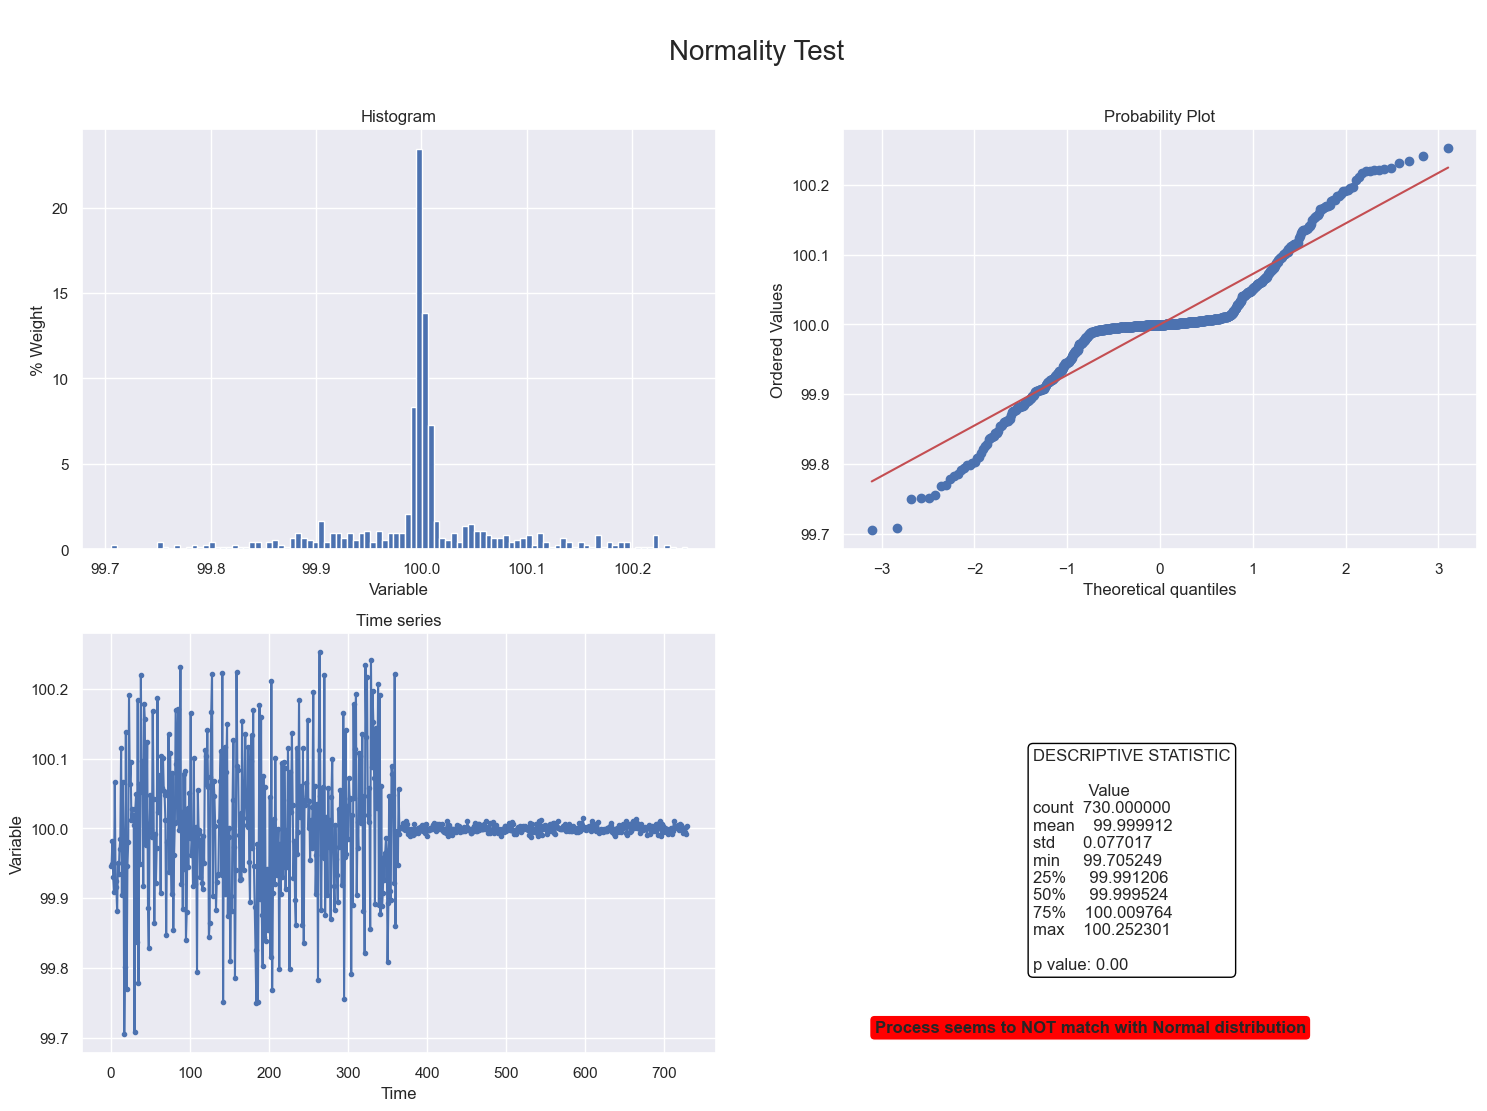

In [12]:
figure=Model_Cp.Normality_test()
plt.show()

sending both batch of measurement, process doesn't be represented as normal. Lets check the individual behavior

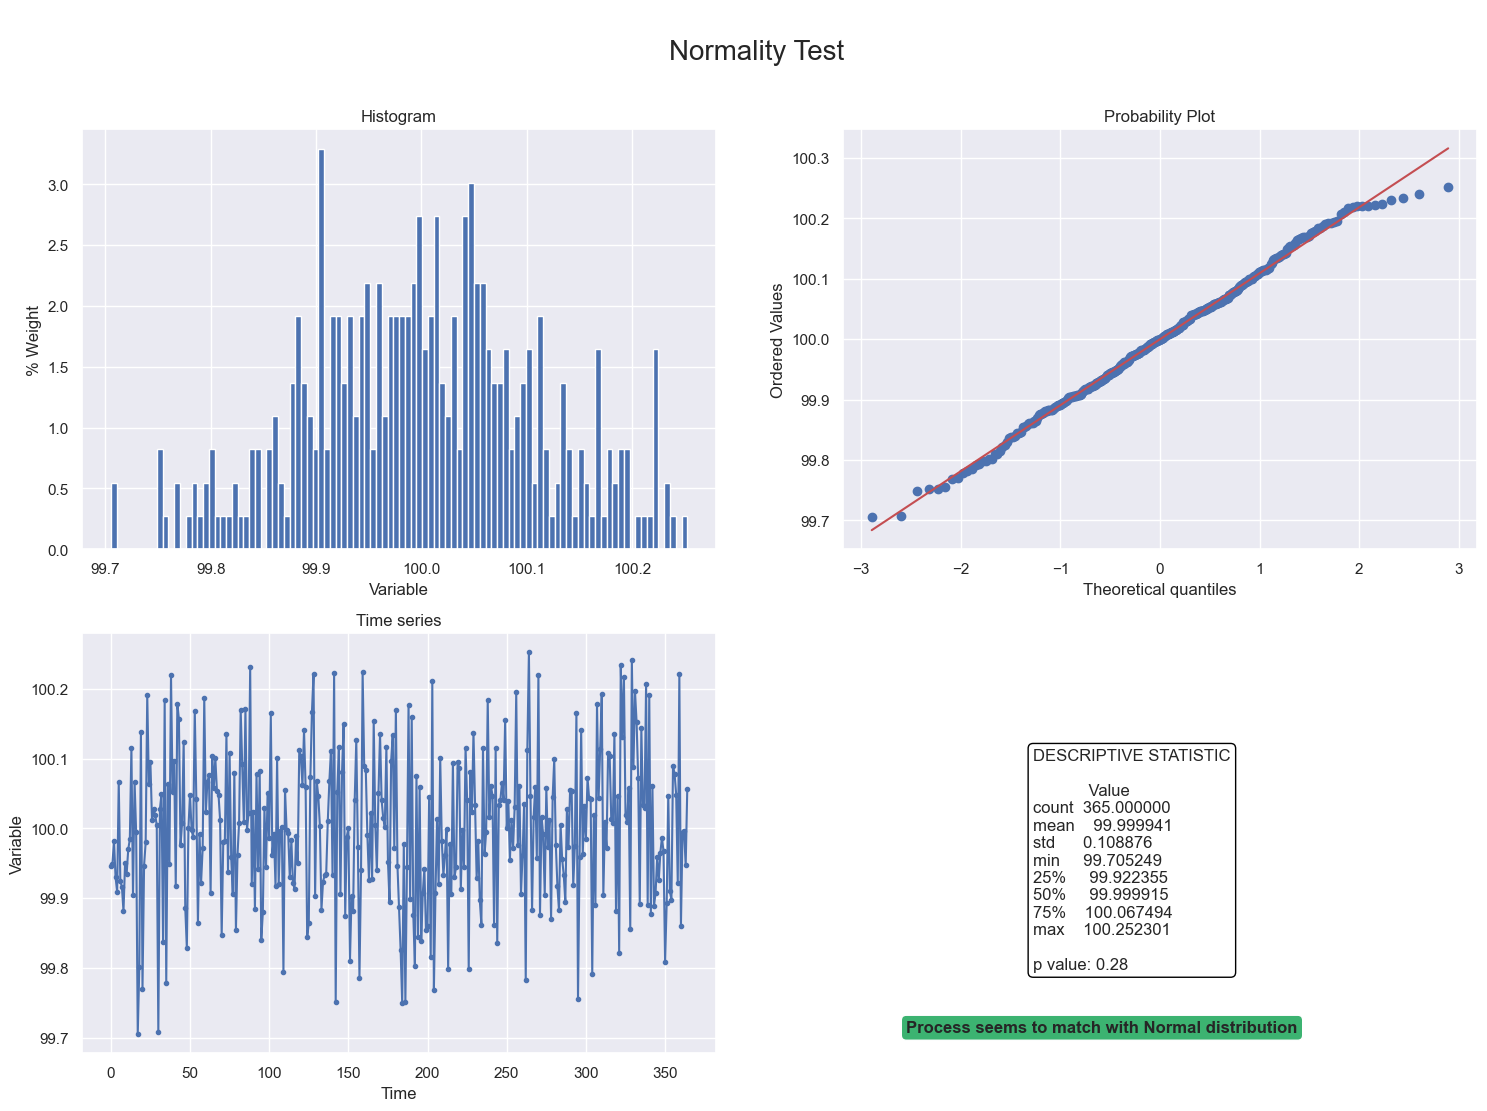

In [13]:
df_1=df[df['batch']==1]
#Lets define the model
dict_info_1={
  'value':'Weigth',
  'batch':'',
  'LSL':100-0.2,
  'HSL':100+0.2,
  'goal':100
}  
Model_Cp_1=Capability.Capability(df_1,dict_info_1)
figure=Model_Cp_1.Normality_test()
plt.show()

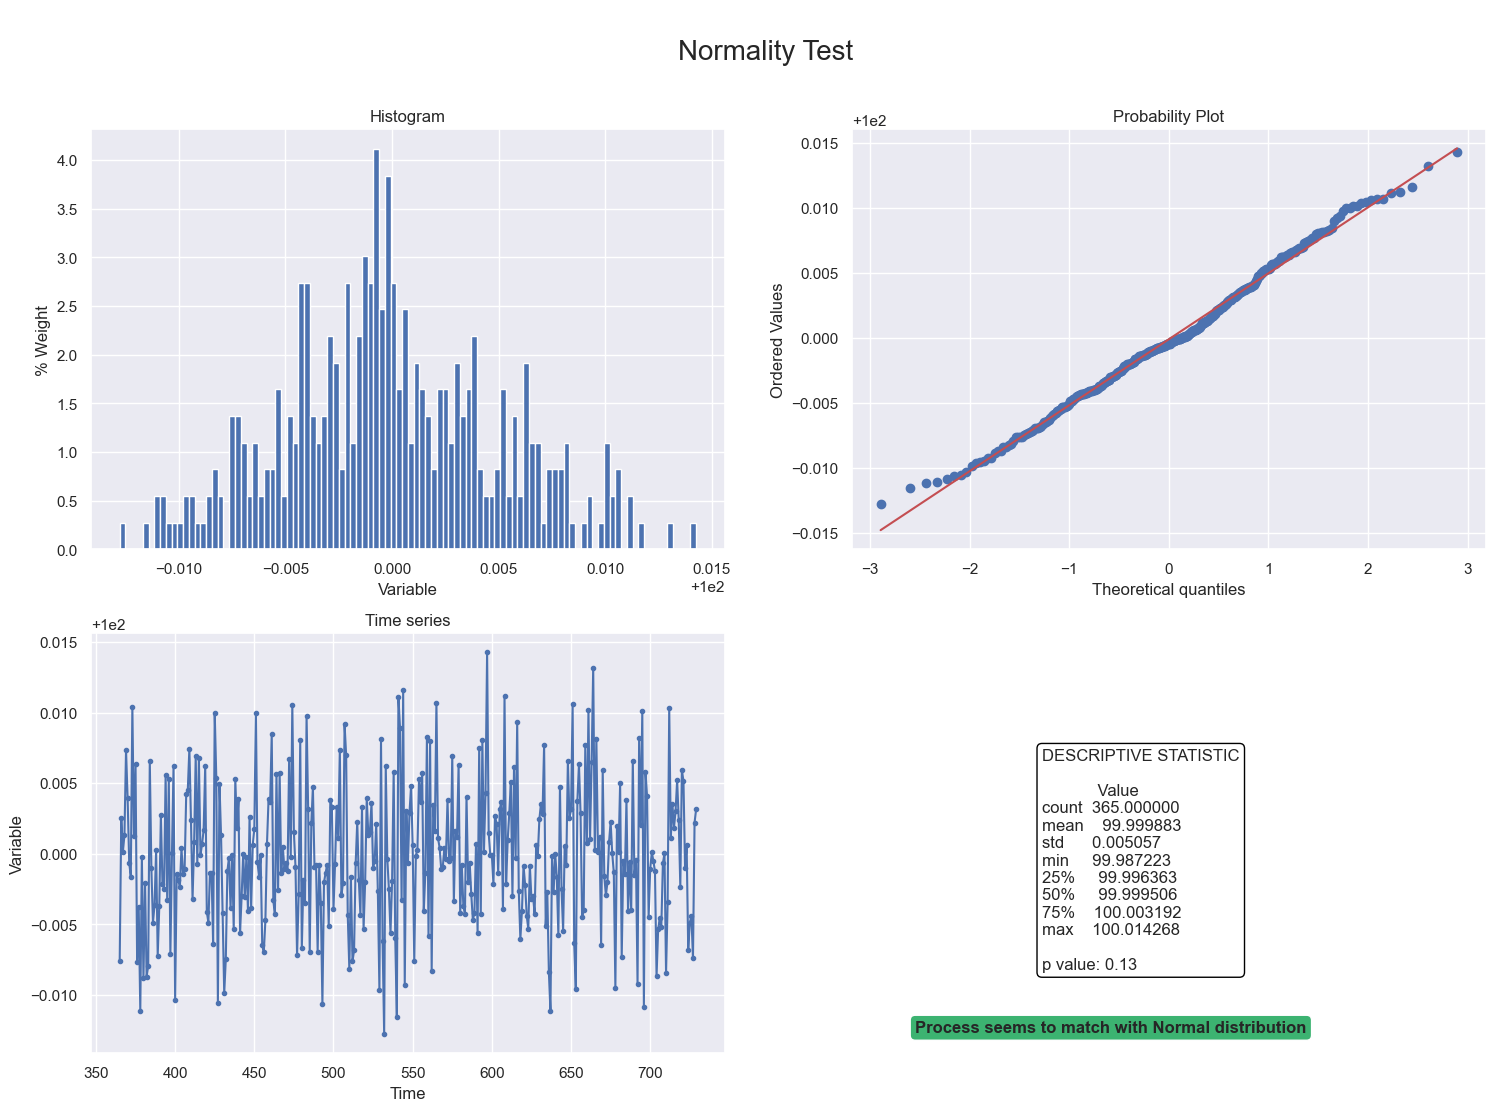

In [14]:
df_2=df[df['batch']==2]
#Lets define the model
dict_info_2={
  'value':'Weigth',
  'batch':'',
  'LSL':100-0.2,
  'HSL':100+0.2,
  'goal':100
}  
Model_Cp_2=Capability.Capability(df_2,dict_info_2)
figure=Model_Cp_2.Normality_test()
plt.show()

both are normal, so, capability analysis could be done

### 3.3.5- STEP 4: Print report

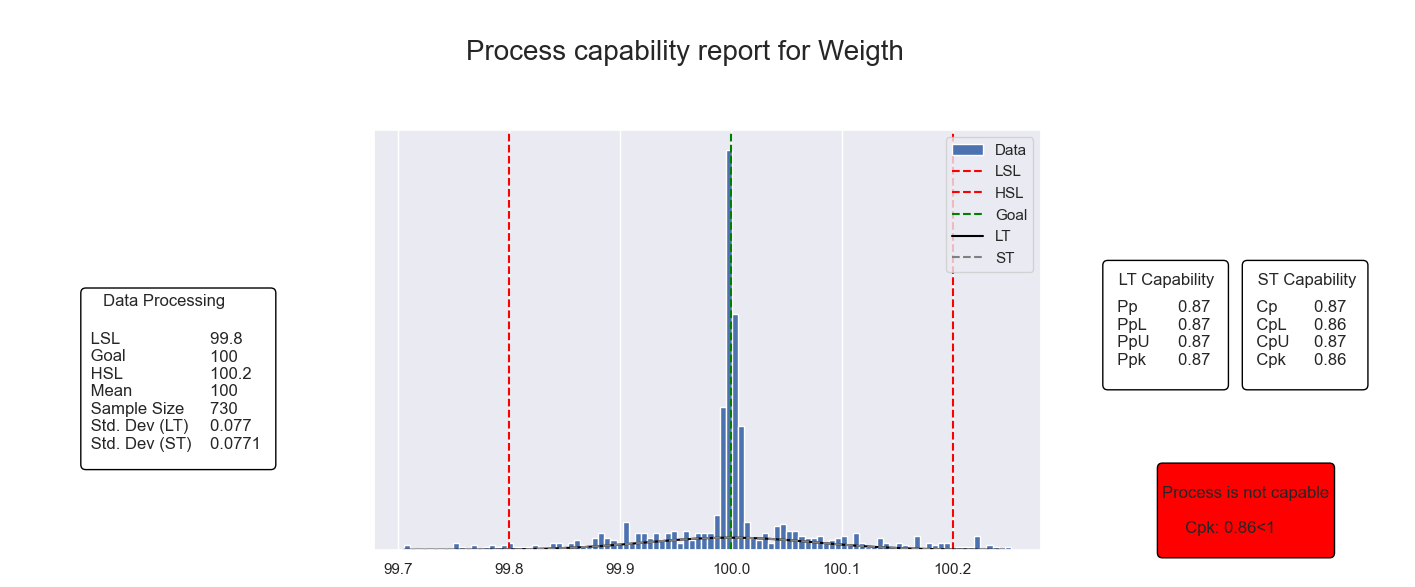

In [15]:
figure=Model_Cp.Report()
plt.show()

while global process seems to not be capable, analyze each batch could be a clue

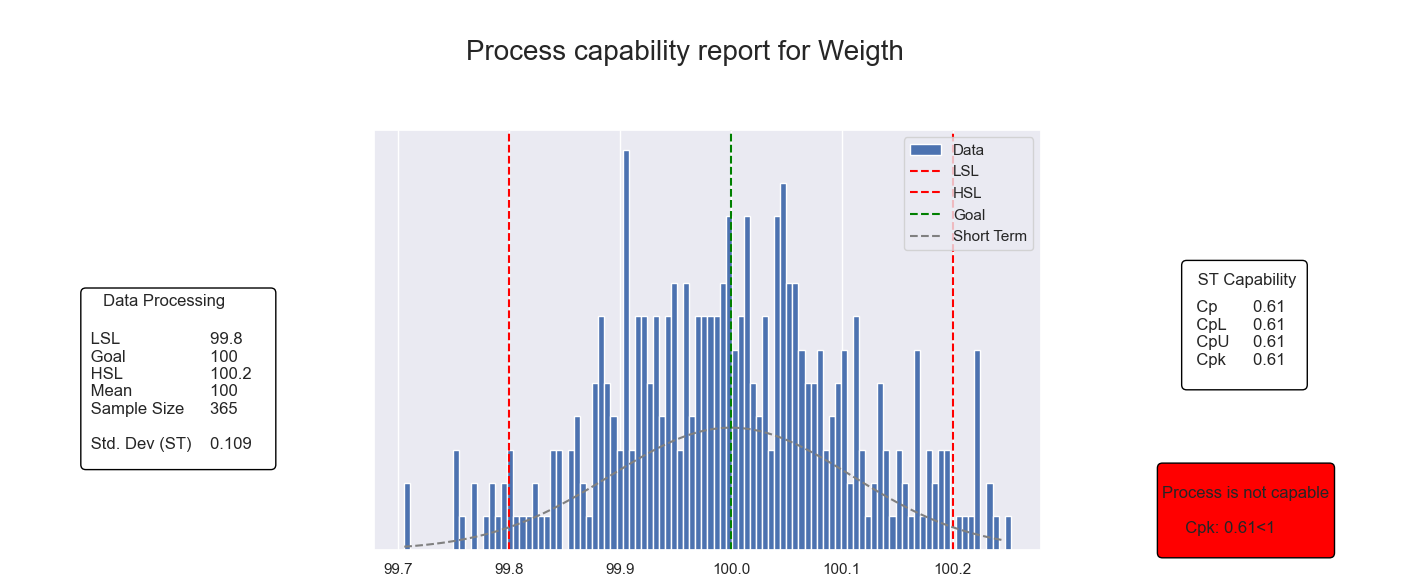

In [16]:
figure=Model_Cp_1.Report()
plt.show()

process was not capable, then, the process engineer proposed some changes:

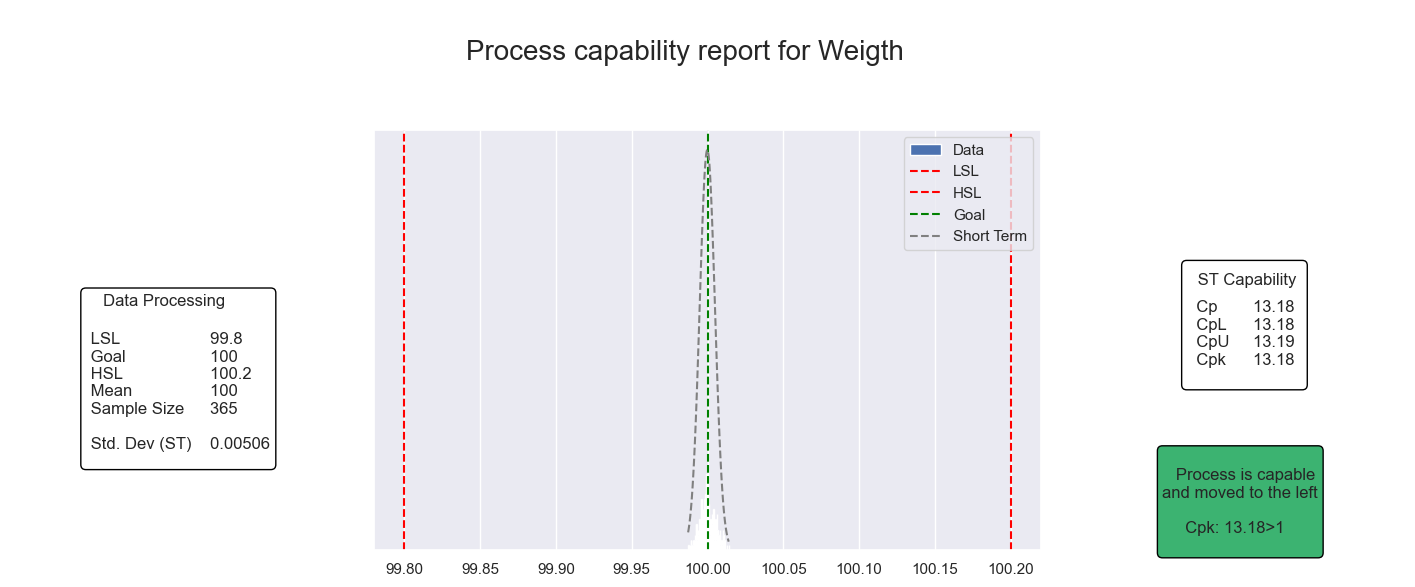

In [17]:
figure=Model_Cp_2.Report()
plt.show()

and the process became capable